In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
dictionary = pd.read_csv('taxi+_zone_lookup.csv')

In [43]:
dictionary.head()
#bad locations: 0, 265, 264

,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [59]:
def look_up(loc_id):
    return dictionary[dictionary['LocationID'] == loc_id]['Zone'].values[0]

data = pd.read_csv( 'nhbr_data.csv', names = ['PU','DO','$','passengers','occurences']
                  )
data['PU'] = data['PU'].str[1:]

data['occurences'] = data['occurences'].str[:-1]
data = data[ (data['DO'] != 0) | (
    data['PU'] != 0) | (data['DO'] != 265) | (data['PU'] != 265) | (data['DO'] != 264) | (data['PU'] != 264)  ]
data['occurences'] = pd.to_numeric(data['occurences'], errors='coerce')
data['PU'] = pd.to_numeric(data['PU'], errors='coerce')
data['DO'] = pd.to_numeric(data['DO'], errors='coerce')

data = data.sort(['occurences'], ascending = False)#, ascending=[1, 0])

data['PU_nhbr'] = data['PU'].apply(lambda x: look_up(x))
data['DO_nhbr'] = data['DO'].apply(lambda x: look_up(x))

#data['PU_nhbr'] = look_up(data['PU'])#data.apply(look_up, axis = 1)
data.head()

/home/lihan/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:17: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,PU,DO,$,passengers,occurences,PU_nhbr,DO_nhbr
602,264,264,2023781.44,181296,123420,NV,NV
15148,237,236,508985.12,96487,59971,Upper East Side South,Upper East Side North
3874,236,237,514994.06,82977,51683,Upper East Side North,Upper East Side South
7853,236,236,346423.26,78574,48911,Upper East Side North,Upper East Side North
18884,237,237,352327.33,72380,45599,Upper East Side South,Upper East Side South


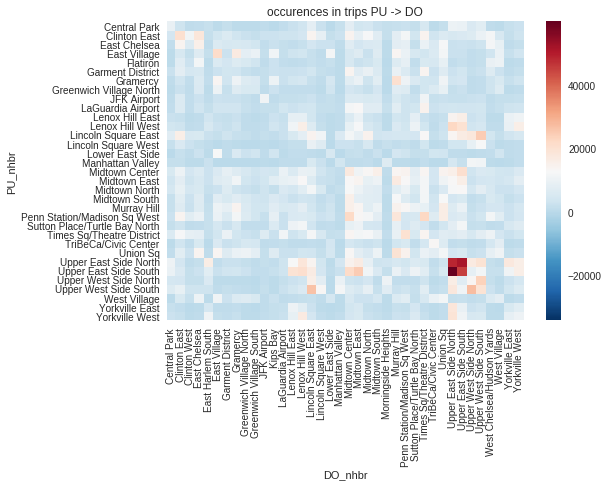

In [155]:
import seaborn as sns; sns.set()

display = data.iloc[1:200 ,:]

def matrix(string):
    flights = display.pivot("PU_nhbr", "DO_nhbr", string)
    for index, row in flights.iterrows():
        for col in row.index:
            flights = flights.set_value(
                index, col, 
                data[(data['DO_nhbr'] == col) & (
                    data['PU_nhbr'] == index)][string].values[0])
    # to stop centering the heatmap at
    # median value, comment out center argument
    ax= sns.heatmap(flights, center = display[string].median())#,cmap=cmap)
    plt.title('%s in trips PU -> DO' %(string) )
    
matrix('occurences')

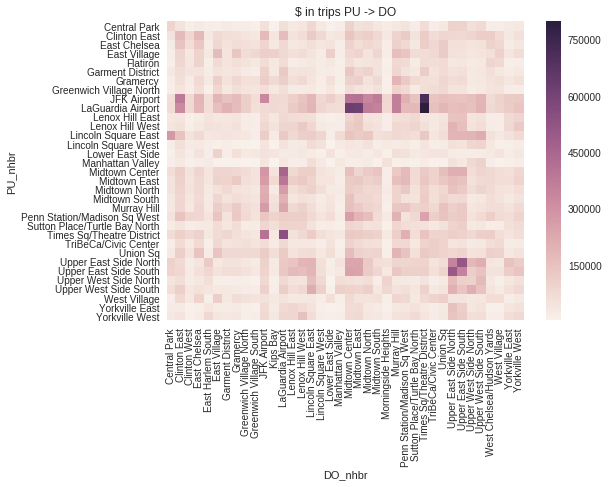

In [153]:
matrix('$')

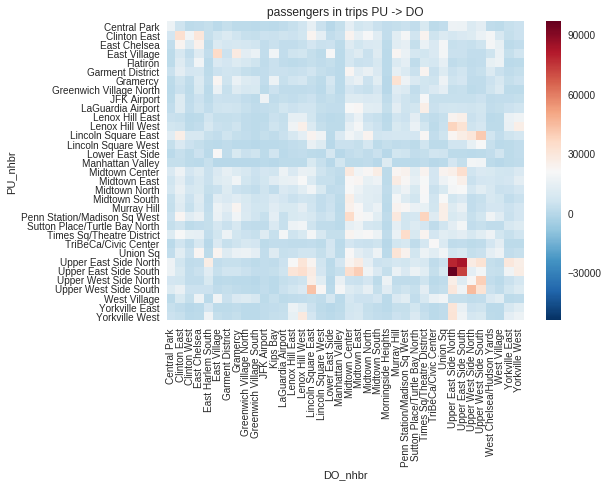

In [157]:
matrix('passengers')

In [156]:
# http://seaborn.pydata.org/generated/seaborn.heatmap.html
#>>> import numpy as np; np.random.seed(0)
#>>> import seaborn as sns; sns.set()
#>>> flights = sns.load_dataset("flights")
#>>> flights = flights.pivot("month", "year", "passengers")
#flights
#plt.xticks(rotation=90)
#>>> ax = sns.heatmap(flights)